# Task 1 :  Prediction using Decision Tree Algorithm

## By Tarun Kumar Singh
## #gripjan21

<h3>Objectives : <br/>
<p>
● Create the Decision Tree classifier and visualize it graphically<br/>
● If we feed any new data to this classifier, it would be able to predict the right class accordingly. 
</p></h3>

## Step 1: Exploratory Data Analysis

### Import libraries for performing EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Extract data from csv dataset

In [2]:
ir=pd.read_csv('Iris.csv')
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Count the number of species in dataset

In [3]:
ir['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Check if any null values in dataset

In [4]:
ir.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Some details of each column

In [5]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Statistical summary of each (numerical) column

In [6]:
ir.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


## Analysis through visualization

### Pie chart for count of species

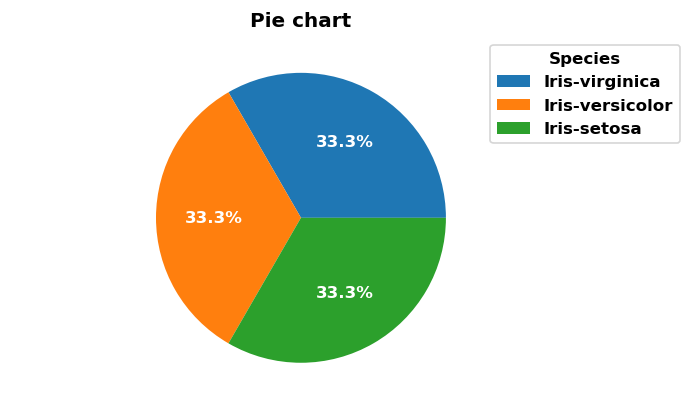

In [7]:
fig = plt.figure(dpi=120)
ax = fig.add_subplot()
d = ir["Species"].value_counts().to_dict()

ax.pie(d.values(), 
       labels = d.keys(), 
       autopct = '%1.1f%%', 
       textprops = {'fontsize': 10, 'color' : "white"} 
      )


ax.set_title("Pie chart")

ax.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.5, 1), fontsize = 10, title = "Species");

### Joyplot to distinguish the parts of an iris

<Figure size 900x600 with 0 Axes>

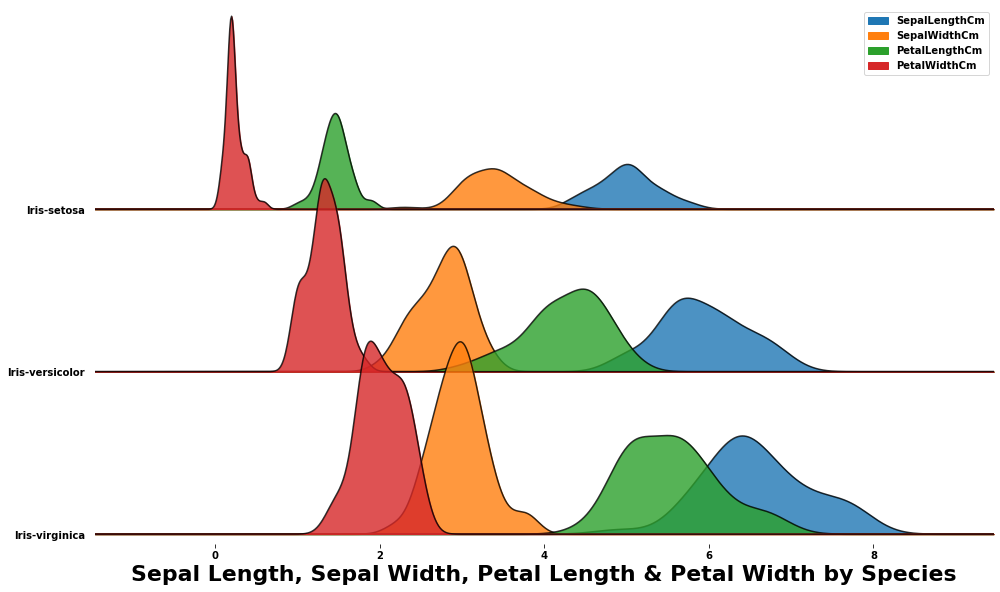

In [8]:
import joypy
plt.figure(dpi = 150)
fig, axes = joypy.joyplot(ir, 
                          column = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                          by = "Species",
                          ylim = 'own', 
                          legend = True,
                          alpha = 0.8,
                          figsize = (14,8)
                         )


plt.xlabel('Sepal Length, Sepal Width, Petal Length & Petal Width by Species', fontsize = 22)
plt.rc("font", size = 15);


### Some density plots to give an idea on how these species differ from each other

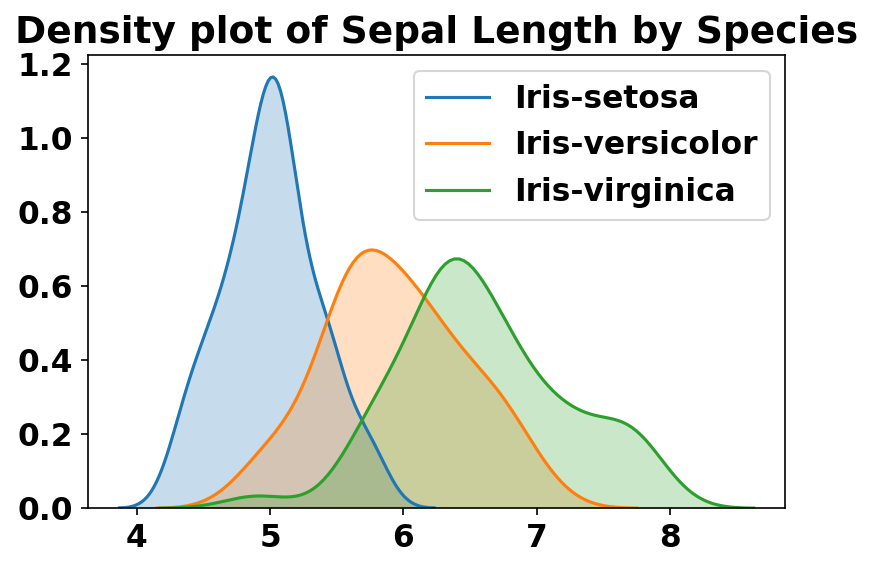

In [9]:
plt.figure(dpi=150)
for s in ir['Species'].unique():
    x= ir[ir["Species"] == s]['SepalLengthCm']
    sns.kdeplot(x, shade= True, label = "{}".format(s))
    
plt.title("Density plot of Sepal Length by Species");

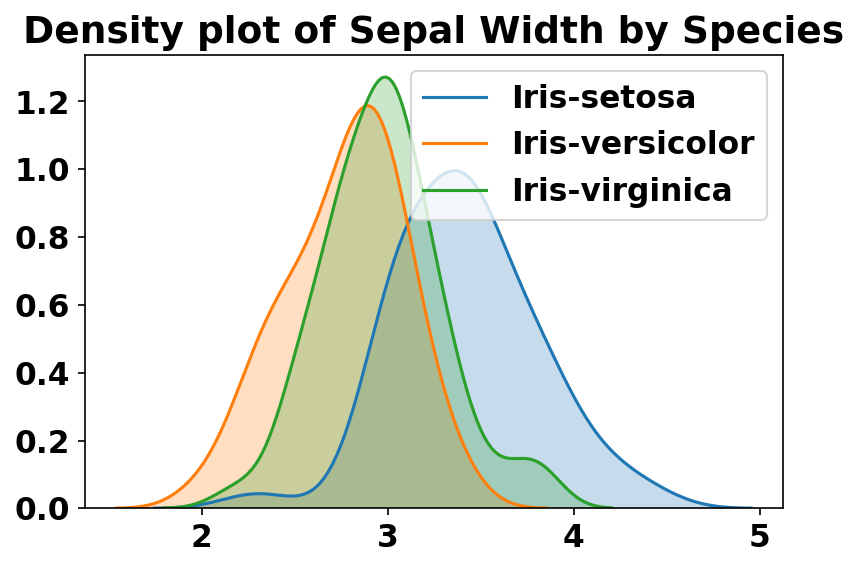

In [10]:
plt.figure(dpi=150)
for s in ir['Species'].unique():
    x= ir[ir["Species"] == s]['SepalWidthCm']
    sns.kdeplot(x, shade= True, label = "{}".format(s))
    
plt.title("Density plot of Sepal Width by Species");

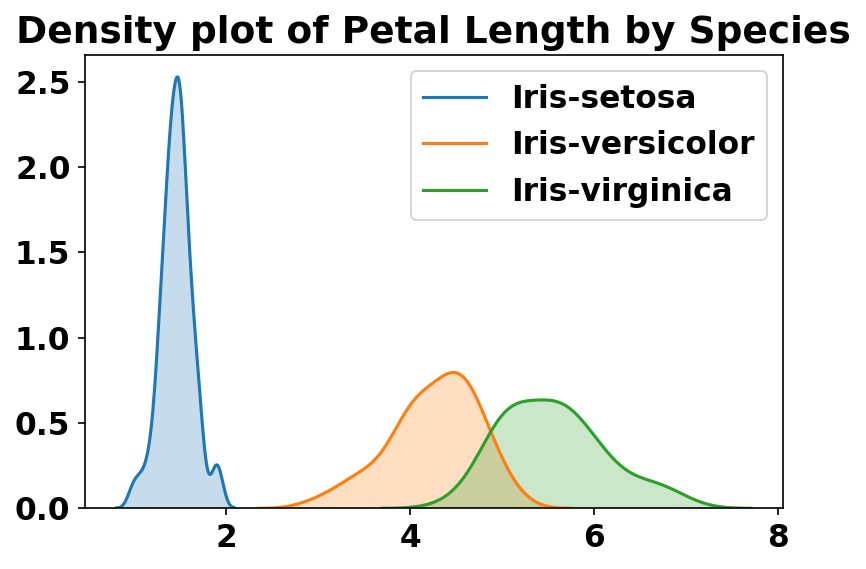

In [11]:
plt.figure(dpi=150)
for s in ir['Species'].unique():
    x= ir[ir["Species"] == s]['PetalLengthCm']
    sns.kdeplot(x, shade= True, label = "{}".format(s))
    
plt.title("Density plot of Petal Length by Species");

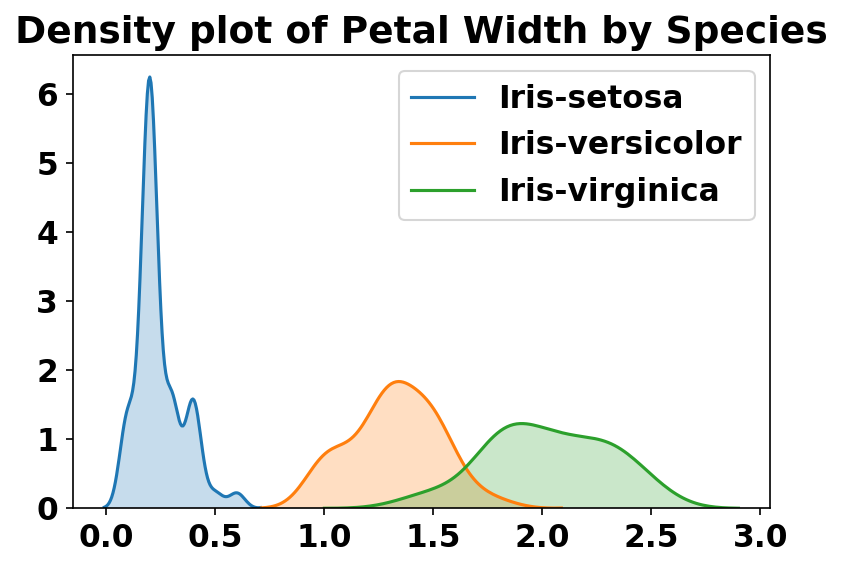

In [12]:
plt.figure(dpi=150)
for s in ir['Species'].unique():
    x= ir[ir["Species"] == s]['PetalWidthCm']
    sns.kdeplot(x, shade= True, label = "{}".format(s))
    
plt.title("Density plot of Petal Width by Species");

### Lets find correlation between each columns

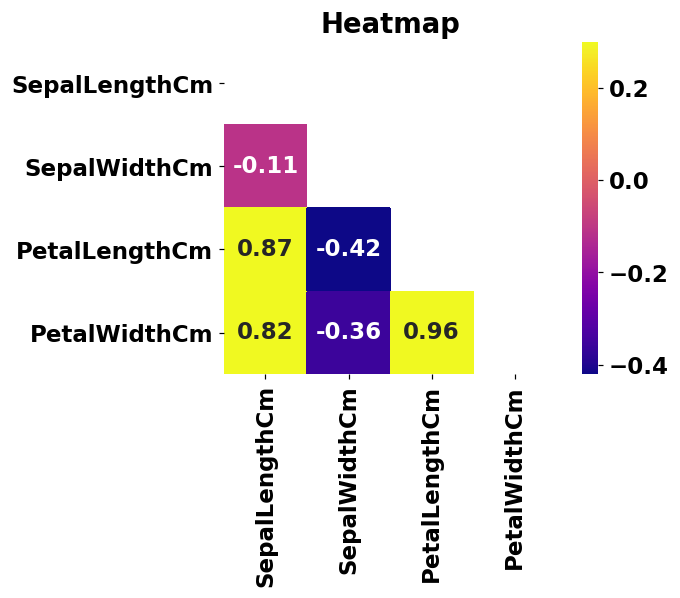

In [13]:
corr = ir.iloc[:,1:].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(dpi=110)

ax = sns.heatmap(corr, 
                 mask = mask, 
                 vmax = 0.3, 
                 square = True,  
                 annot = True,
                 cmap = "plasma")
ax.set_title("Heatmap");

## Step 2: Machine learning model

### Import required libraries to support machine learning model

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
import pydotplus

### Extract target variables and features from dataset

In [15]:
X = ir.drop('Species', axis=1).iloc[:,1:]
y = ir['Species'].replace('Iris-setosa',0).replace('Iris-versicolor',1).replace('Iris-virginica',2)

### Select Decision Tree Classifier model to classify species.
### & then fit the model with features and target variables.

In [16]:
model= DecisionTreeClassifier()
model.fit(X,y)

DecisionTreeClassifier()

### Now plot the Decision tree model using graphviz

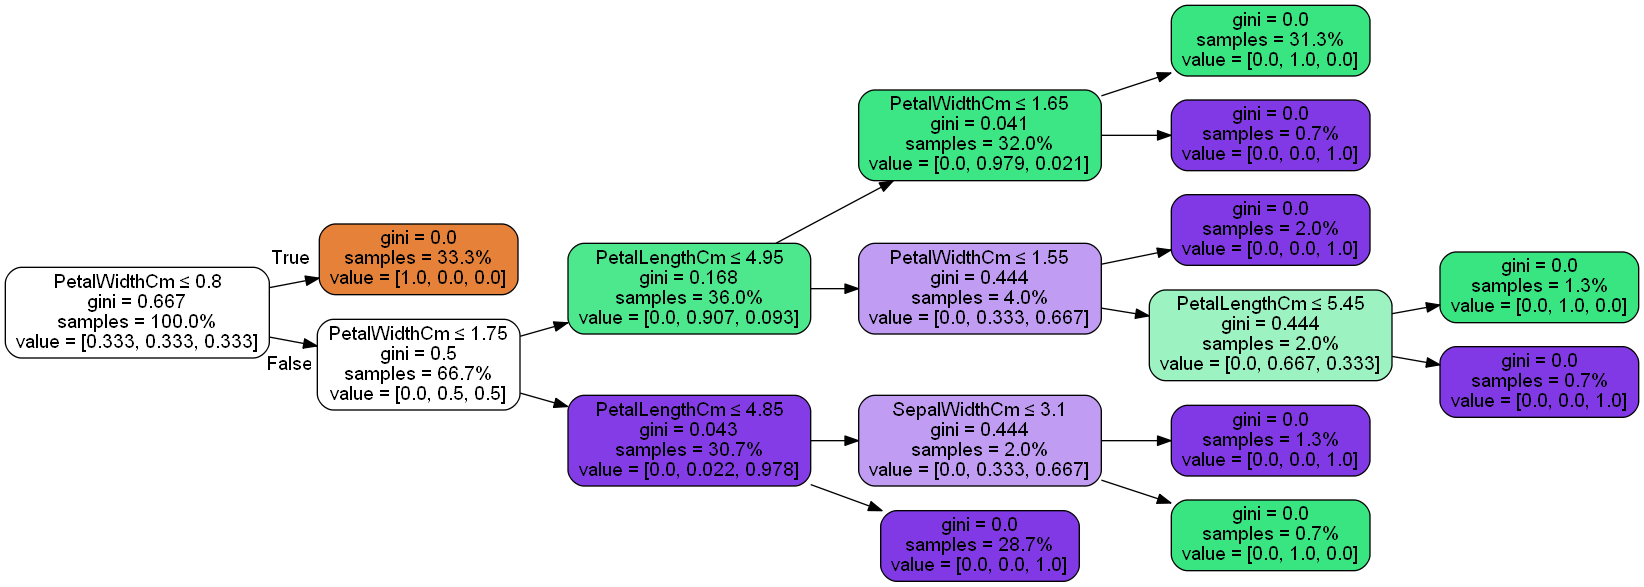

In [17]:
my_graph = tree.export_graphviz(model, out_file=None, feature_names=X.columns,  
                filled=True, rounded=True, special_characters=True, proportion=True, rotate=True)

graph = pydotplus.graph_from_dot_data(my_graph)
Image(graph.create_png(), unconfined=True, width=1500)

### Confusion matrix to see if model fits to given data and predict the right class of the trained features

Text(0.5, 1.0, 'Confusion matrix')

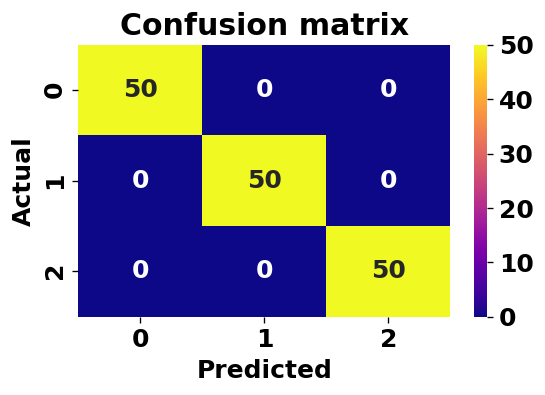

In [18]:
y_pred=model.predict(X)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,3), dpi=120)
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt='.4g', cmap= 'plasma')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix')

### Model is ready to predict species, if we feed any new data to this classifier

### Example:

In [19]:
def decision(x):
    y1=model.predict(np.array(x).reshape(1,-1))
    if y1==0:
        print('Iris-setosa')
    elif y1==1:
        print('Iris-versicolor')
    elif y1==2:
        print('Iris-virginica')


In [29]:
X1=[6.7, 3.0, 5.2, 0.3]
decision(X1)

Iris-setosa


## Thank you